In [2]:
pip install yfinance

     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 6.4 MB 60.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import yfinance as yf


In [14]:
stock = ['MSFT']
df = yf.download ( 'MSFT', start = '2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.930531,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.671329,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.671329,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.171207,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.986073,20382700


<Figure size 1152x576 with 0 Axes>

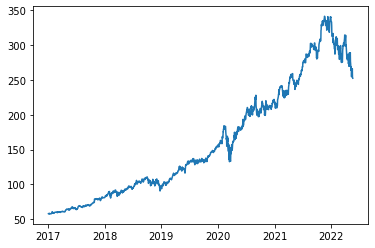

<Figure size 1152x576 with 0 Axes>

In [19]:
plt.plot(df['Adj Close'])
plt.figure(figsize=(16,8))

In [21]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [24]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.930531,20694100,NaN,NaN
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.671329,21340000,NaN,NaN
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.671329,24876000,NaN,NaN
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.171207,19922900,NaN,NaN
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.986073,20382700,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-16,259.959991,265.820007,255.779999,261.500000,260.892365,32550900,274.795975,286.900580
2022-05-17,266.109985,268.329987,262.459991,266.820007,266.200012,28828800,273.874123,286.659342
2022-05-18,263.000000,263.600006,252.770004,254.080002,254.080002,31356000,272.293394,286.236762


In [25]:
df = df.dropna()

In [26]:
df = df[['Adj Close' ,'MA20', 'MA50']]

In [27]:
df

,Adj Close,MA20,MA50
Date,,,
2017-03-15,60.302681,60.086623,59.256215
2017-03-16,60.200249,60.091745,59.301609
2017-03-17,60.414444,60.108044,59.356472
2017-03-20,60.470325,60.122479,59.412452
2017-03-21,59.799789,60.109441,59.445023
...,...,...,...
2022-05-16,260.892365,274.795975,286.900580
2022-05-17,266.200012,273.874123,286.659342
2022-05-18,254.080002,272.293394,286.236762


In [28]:
#creating two empty lists
Buy =[]
Sell = []

for i in range(len(df)):
  if df.MA20.iloc[i] > df.MA50.iloc[i] \
  and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
       Buy.append(i)
  elif df.MA20.iloc[i] < df.MA50.iloc[i] \
  and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
       Sell.append(i)



In [29]:
Buy

[0, 281, 446, 475, 629, 633, 781, 908, 948, 1022, 1072, 1164, 1273]

In [31]:
Sell

[268, 407, 447, 616, 631, 754, 891, 946, 1013, 1057, 1149, 1213, 1288]

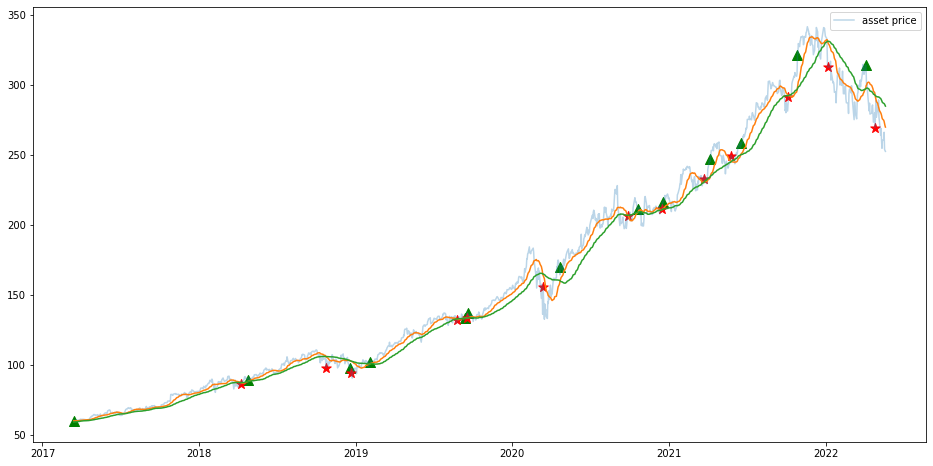

In [42]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label = 'asset price', alpha = 0.3)
plt.plot(df['MA20'])
plt.plot(df['MA50'])

plt.scatter(df.iloc[Buy].index , df.iloc[Buy]['Adj Close'], marker = '^' , color = 'g', s=100)
plt.scatter(df.iloc[Sell].index , df.iloc[Sell]['Adj Close'] , marker = '*', color = 'r', s = 100 )
plt.legend()
plt.show()